## Bag of n_grams: Exercise
- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

#### About Data: Fake News Detection
- Credits: https://www.kaggle.com/datasets/nopdev/real-and-fake-news-dataset

- This data consists of two columns. - Text - label

- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the Binary Classification.

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('dataset/news.csv')

In [37]:
df.shape

(6335, 4)

In [38]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [39]:
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [40]:
df['text'] = df['title'] + " " + df['text']

In [41]:
df.drop(['Unnamed: 0', 'title'], axis = 1, inplace = True)

In [42]:
df['label_num'] = df.label.map({
    'FAKE': 0,
    'REAL': 1
})

In [43]:
df.head()

,text,label,label_num
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,0
2,Kerry to go to Paris in gesture of sympathy U....,REAL,1
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,0
4,The Battle of New York: Why This Primary Matte...,REAL,1


#### Modelling without Pre-processing Text data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.text, 
                                                    df.label_num, 
                                                    test_size = 0.2, 
                                                    random_state = 2022, 
                                                    stratify = df.label_num)

In [46]:
X_train.shape

(5068,)

In [47]:
X_test.shape

(1267,)

#### Attempt 1 :

- using sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [49]:
clf1 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 3))),
    ('knn', KNeighborsClassifier(n_neighbors = 10,
                                 metric = 'euclidean'))
])

In [50]:
clf1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [51]:
y_pred = clf1.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       633
           1       0.74      0.63      0.68       634

    accuracy                           0.70      1267
   macro avg       0.71      0.70      0.70      1267
weighted avg       0.71      0.70      0.70      1267



#### Attempt 2 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.

In [54]:
clf2 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 3))),
    ('knn', KNeighborsClassifier(n_neighbors = 10,
                                 metric = 'cosine'))
])

In [55]:
clf2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('knn', KNeighborsClassifier(metric='cosine', n_neighbors=10))])

In [56]:
y_pred = clf2.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       633
           1       0.74      0.75      0.75       634

    accuracy                           0.74      1267
   macro avg       0.74      0.74      0.74      1267
weighted avg       0.74      0.74      0.74      1267



#### Attempt 3 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf3 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (3, 3))),
    ('rf', RandomForestClassifier())
])

In [60]:
clf3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(3, 3))),
                ('rf', RandomForestClassifier())])

In [61]:
y_pred = clf3.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       633
           1       0.91      0.79      0.85       634

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267



#### Attempt 4 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with both unigram and bigrams.
- use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
- print the classification report.

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clf4 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),
    ('nb', MultinomialNB(alpha = 0.75))
])

In [65]:
clf4.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.75))])

In [66]:
y_pred = clf4.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       633
           1       0.86      0.98      0.92       634

    accuracy                           0.91      1267
   macro avg       0.92      0.91      0.91      1267
weighted avg       0.92      0.91      0.91      1267



#### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [68]:
import spacy

In [69]:
nlp = spacy.load("en_core_web_sm")

In [70]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [71]:
df['preprocessed_txt'] = df.text.map(preprocess)

In [72]:
df.head()

,text,label,label_num,preprocessed_txt
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,0,smell Hillary Fear Daniel Greenfield Shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,0,watch Exact Moment Paul Ryan Committed Politic...
2,Kerry to go to Paris in gesture of sympathy U....,REAL,1,Kerry Paris gesture sympathy U.S. Secretary St...
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,0,Bernie supporter Twitter erupt anger DNC try w...
4,The Battle of New York: Why This Primary Matte...,REAL,1,Battle New York Primary matter primary day New...


#### Build a model with pre processed text

In [73]:
X_train, X_test = train_test_split(df['preprocessed_txt'], 
                                    test_size = 0.2, 
                                    random_state = 2022, 
                                    stratify = df.label_num)

#### Let's check the scores with our best model till now

- Random Forest (for our dataset its multinoimal nb)

#### Attempt1 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [74]:
clf5 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (3, 3))),
    ('rf', RandomForestClassifier())
])

In [75]:
clf5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(3, 3))),
                ('', RandomForestClassifier())])

In [76]:
y_pred = clf5.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       633
           1       0.98      0.60      0.74       634

    accuracy                           0.79      1267
   macro avg       0.85      0.79      0.79      1267
weighted avg       0.85      0.79      0.79      1267



#### Attempt2 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with unigram, Bigram, and trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [79]:
clf6 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 3))),
    ('rf', RandomForestClassifier())
])

In [80]:
clf6.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('rf', RandomForestClassifier())])

In [81]:
y_pred = clf6.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       633
           1       0.87      0.88      0.88       634

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[553,  80],
       [ 75, 559]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

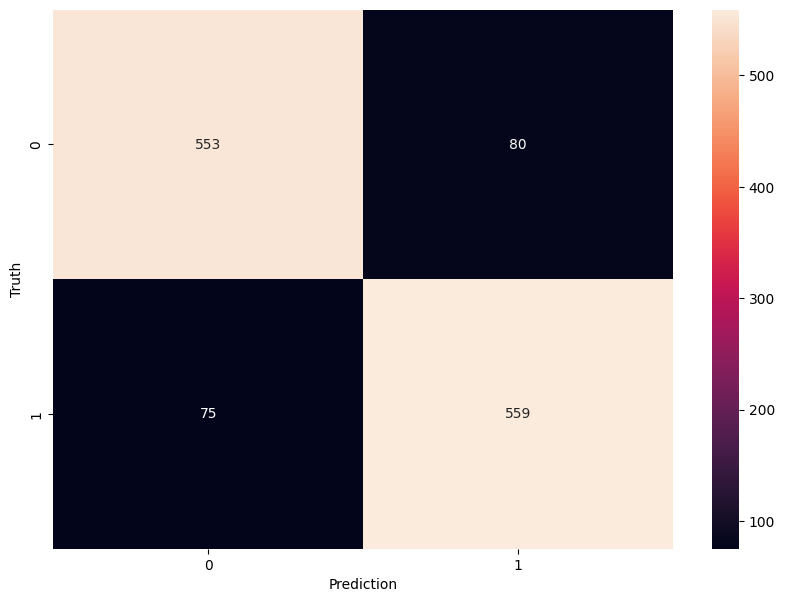

In [85]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')